
**Import required libraries and modules**
________________________________________________________________________________

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns  
from matplotlib.pyplot import figure
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler


**Read the data**
________________________________________________________________________________

In [40]:
data=pd.read_csv('/content/2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [41]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [62]:
data.describe()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,77.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,77.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,116.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,155.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000



**Exploratory Data Analysis**
________________________________________________________________________________

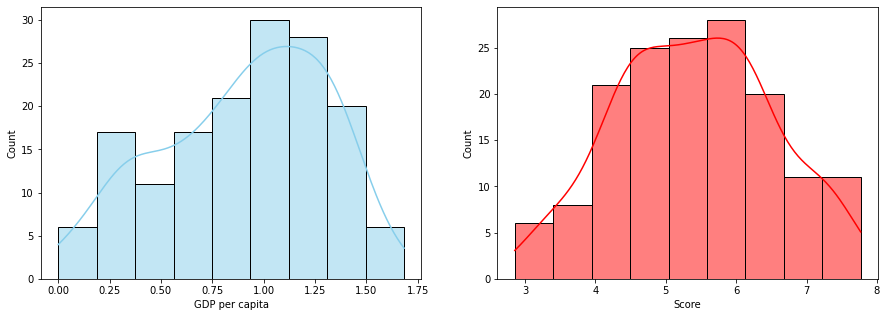

In [70]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data['GDP per capita'],kde=True,ax=axes[0],color="skyblue")
sns.histplot(data['Score'],kde=True,ax=axes[1], color="red")

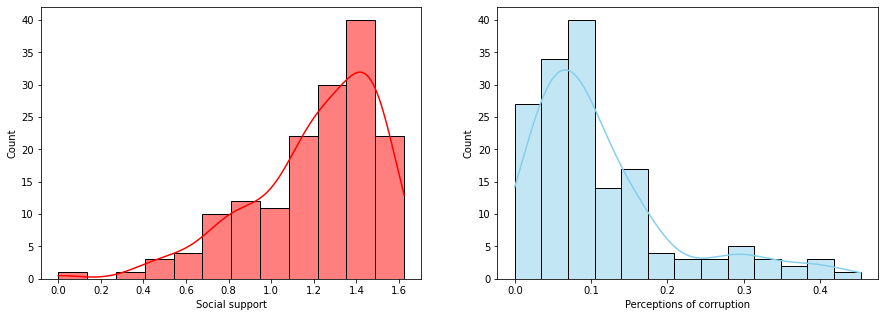

In [69]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data['Social support'],kde=True,ax=axes[0],color='red')
sns.histplot(data['Perceptions of corruption'],kde=True,ax=axes[1], color = "skyblue")

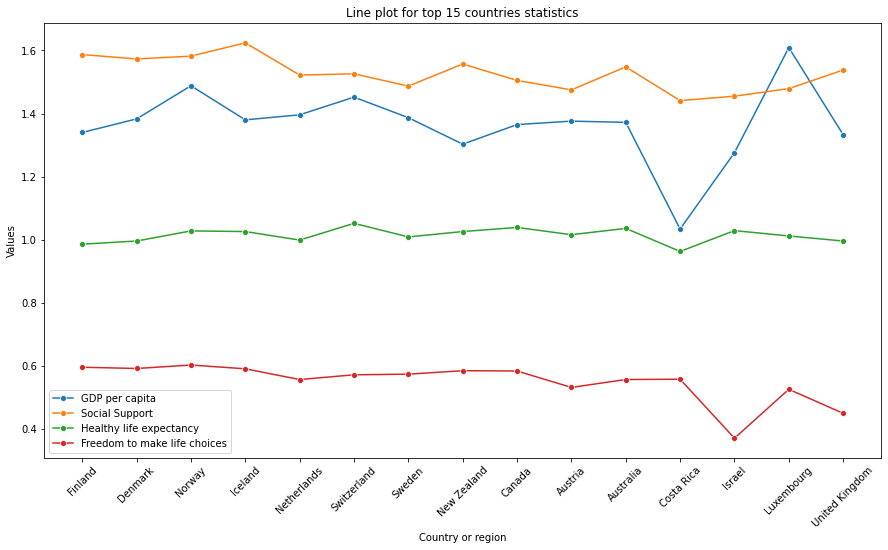

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data[:15],x="Country or region",y="GDP per capita",marker='o',label='GDP per capita')
sns.lineplot(data=data[:15],x="Country or region",y="Social support",marker='o',label='Social Support')
sns.lineplot(data=data[:15],x="Country or region",y="Healthy life expectancy",marker='o',label='Healthy life expectancy ')
sns.lineplot(data=data[:15],x="Country or region",y="Freedom to make life choices",marker='o',label='Freedom to make life choices')
plt.xticks(rotation = 45)
plt.ylabel('Values')
plt.title('Line plot for top 15 countries statistics')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


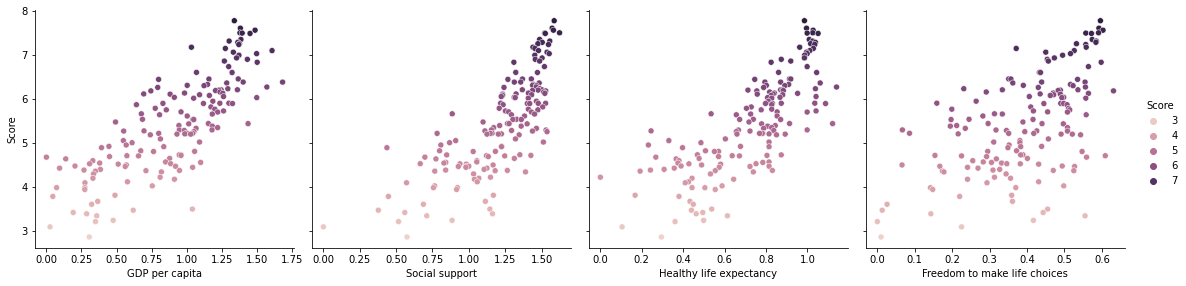

In [75]:
sns.pairplot(data, 
             x_vars=["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices"], 
             y_vars=["Score"],hue="Score", size =4)

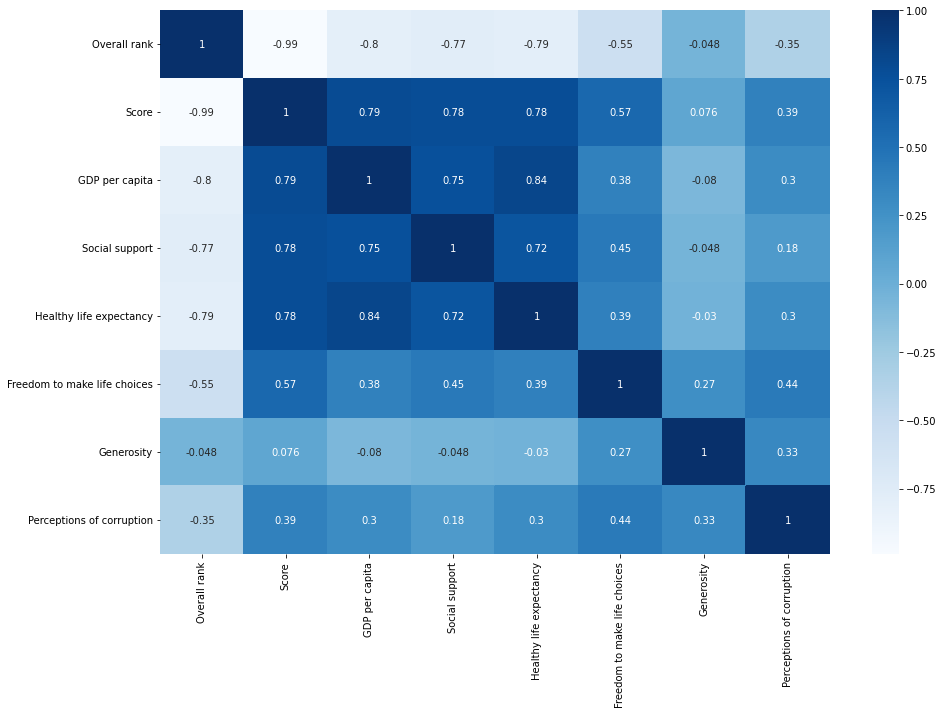

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')


**Data Preprocessing**
________________________________________________________________________________

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [48]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [49]:
data.drop('Overall rank', axis=1, inplace=True)

In [50]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['Country or region'])
data['Country or region'] = label_encoder.transform(data['Country or region'])


**Machine Learning**
________________________________________________________________________________

In [51]:
X_train = data.drop(['Score'], axis = 1)
Y_train = data['Score']
X_test = data.drop(['Score'], axis = 1)
Y_test = data['Score']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((156, 7), (156,), (156, 7), (156,))

**Linear Regression**

In [52]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [53]:
preds = model.predict(X_test)

In [54]:
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, preds))

Coefficient of determination: 0.79


In [55]:
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, preds)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, preds)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, preds))))
metrics.r2_score(Y_test, preds)

MAE: 0.4064482993266199
MSE: 0.2636790341088519
RMSE: 0.513496868645615


0.7858171813065951

**XGB Regressor**

In [56]:
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)

xgb.fit(X_train, Y_train)

[18:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=4)

In [57]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

XGBRegressor(gpu_id=-1, interaction_constraints='', learning_rate=0.2,
             max_depth=4, monotone_constraints='()', n_jobs=0,
             num_parallel_tree=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [58]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [59]:
acc_train_xgb = xgb.score(X_train, Y_train)
acc_test_xgb = xgb.score(X_test, Y_test)

rmse_train_xgb = np.sqrt(mean_squared_error(Y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(Y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.999
XGBoost Regression: Accuracy on test Data: 0.999

XGBoost Regression: The RMSE of the training set is:  0.024896828192763922
XGBoost Regression: The RMSE of the testing set is:  0.024896828192763922


**Random Forest**

In [60]:
def model_score(model, txt):
    y_pred = model.predict(X_test)
    x_pred = model.predict(X_train)
    mae_train=metrics.mean_absolute_error(Y_train, x_pred)
    mae_test=metrics.mean_absolute_error(Y_test, y_pred)
    mse=metrics.mean_squared_error(Y_test, y_pred)
    rmse = metrics.mean_squared_error(Y_test, y_pred, squared=False)

    print(txt, model.score(X_test,Y_test))
    print('MAE Train: ', mae_train)
    print('MAE Test: ', mae_test)
    
    return x_pred, y_pred

In [61]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,Y_train)

rf_x_pred, rf_y_pred = model_score(rf_regressor, 'Random Forest Score: ')

Random Forest Score:  0.970804216756272
MAE Train:  0.1458174145299127
MAE Test:  0.1458174145299127
